In [ ]:
##########################################################################################
#                                                                                        #
#  888888b.  8888888 .d88888b.   .d8888b.     .d8888b.   .d8888b.      d8888      d8888  #
#  888  "88b   888  d88P" "Y88b d88P  Y88b   d88P  Y88b d88P  Y88b    d8P888     d8P888  #
#  888  .88P   888  888     888 Y88b.        888        888          d8P 888    d8P 888  #
#  8888888K.   888  888     888  "Y888b.     888d888b.  888d888b.   d8P  888   d8P  888  #
#  888  "Y88b  888  888     888     "Y88b.   888P "Y88b 888P "Y88b d88   888  d88   888  #
#  888    888  888  888     888       "888   888    888 888    888 8888888888 8888888888 #
#  888   d88P  888  Y88b. .d88P Y88b  d88P   Y88b  d88P Y88b  d88P       888        888  #
#  8888888P" 8888888 "Y88888P"   "Y8888P"     "Y8888P"   "Y8888P"        888        888  #
#                                                                                        # 
##########################################################################################
#
# Slicing and Parsing
#
##########################################################################################

In [1]:
##################################################################################################################
#
# YouDo:
#    1) Make a copy of this notebook with your name as a suffix:  
#       BIOS6644_CSV_Sugar_Metabolomics_FirstLast.ipynb
#    2) Do all work in this new notebook.
#    3) Place completed work in students/Module_1/Your_Name
#    4) Push to your branch on GitHub to submit
#
##################################################################################################################


# Wrangling Sugar Metabolomics Data


In [2]:

import pandas as pd
import pylab as plt
import numpy as np
%matplotlib notebook

In [27]:


# General info here:
#   https://data.mendeley.com/datasets/9z7ncwvxnz/1
#
# Data here:
#   https://prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com/9z7ncwvxnz-1.zip

# I renamed mine to "sugar_metabolomics.csv" so I could remember what it is
data = '../../../../BIOS6644_Spring_2024/Modules/Module_1/Data/sugar_metabolomics.csv'


In [28]:
##################################################################################################################
#
# YouDo:
# 
#    1) Read the csv into a dataframe called df
#######################################  BEGIN STUDENT CODE  #####################################################

# 1) read csv

df = pd.read_csv(data)

#######################################   END STUDENT CODE   #####################################################


df

,Unnamed: 0,Label,Pyruvate,MethylSuccinate,Phosphoglyceric Acid,Glucose 1-phosphate,Malonic Acid,Fumaric Acid,Alpha-Ketoglutaric Acid,Sarcosine,...,3-Hydroxybenzoic acid,Succinate,Glucose,V127,V128,V129,V130,V131,V132,V133
0,20,0,14.158545,15.624522,13.383600,11.923638,13.933560,12.787696,14.981440,11.739484,...,3.161390,2.165842,8.310291624,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,24,0,14.180287,15.325665,13.468363,12.046294,13.043221,12.536227,14.593418,11.833211,...,2.355910,2.260621,8.423733003,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,29,0,13.921329,16.156867,14.615061,13.051929,13.381985,12.419600,14.701978,12.232070,...,2.472365,2.295447,8.357070943,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,52,0,13.785605,15.939535,13.206615,12.342156,12.448068,12.211098,14.860913,11.949448,...,1.844567,2.278589,8.414503996,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,54,0,13.674234,15.743668,11.542008,11.807872,14.582068,11.635154,14.970451,11.457569,...,3.773262,2.136011,8.193979575,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,100,1,13.911391,15.808535,13.255651,12.072060,12.829308,12.518926,14.914205,12.009783,...,2.099744,2.460060,8.268259167,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,101,1,14.004190,15.578057,15.050097,12.955338,12.021058,12.698247,14.838858,11.864216,...,1.215855,2.716850,8.382160574,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,102,1,13.782098,15.628488,13.800509,12.324283,13.557521,13.930284,15.010427,11.877001,...,2.567097,2.339410,8.362964723,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,103,1,13.841570,15.697214,14.467861,12.549533,13.157717,14.309882,14.518098,12.173317,...,1.637428,2.147184,8.379107727,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
##################################################################################################################
#
# YouDo:
# 
#    1) Notice that the import is wonky -- examine the data set
#       manually and figure out how to make it import cleanly.
#      
#       Ensure your data frame has the following handled correctly
#         a) the column names (1st row of the csv)
#.        b) The unlabeled first column is read as an index
#         c) The final row is totally weird--don't import it
#
#       (hint: pd.read_csv? lists various import options)
#
#######################################  BEGIN STUDENT CODE  #####################################################

# 1)row index are read as an unlabeled column.
# pd.read_csv?
#use index_col,  header, and skipfooter for last row
df = pd.read_csv(data, header =0, index_col = 0, skipfooter =1, engine = 'python') #warning says to add engine = python
df

#######################################   END STUDENT CODE   #####################################################
assert df.shape == (92, 132)

In [30]:
##################################################################################################################
#
# YouDo:
# 
#    1) Get rid of any columns that have only NaN values
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
#
#######################################  BEGIN STUDENT CODE  #####################################################

df= df.dropna(axis = 'columns', how = 'all')
df

#######################################   END STUDENT CODE   #####################################################

assert df.shape == (92, 125)





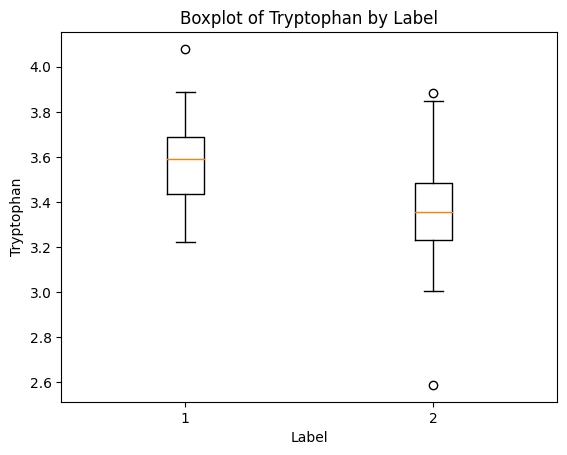

In [7]:
##################################################################################################################
#
# YouDo:
# 
#    1) Generate boxplots of Tryptophan levels separated based on 
#        the "Label" value
#
#      Use whatever plotting library you like.   
#      Hint 1: matplotlib has a boxplot tool
#          help(plt.boxplot)
#      Hint 2: pandas data frames have a built-in boxplot tool
#          help(df.boxplot)
#
#######################################  BEGIN STUDENT CODE  #####################################################
import matplotlib.pyplot as plt
%matplotlib inline  
#plots would not show, had to add this line.

# help(plt.boxplot)
# Separate data for each group based on 'Label'
group_0 = df[df['Label'] == 0]['Tryptophan']
group_1 = df[df['Label'] == 1]['Tryptophan']

# Create boxplot
plt.boxplot([group_0, group_1])
plt.xlabel('Label')
plt.ylabel('Tryptophan')
plt.title('Boxplot of Tryptophan by Label')
plt.show()

#######################################   END STUDENT CODE   #####################################################


                       Pyruvate  MethylSuccinate  Phosphoglyceric Acid  \
Pyruvate               1.000000        -0.075562              0.225787   
MethylSuccinate       -0.075562         1.000000              0.129944   
Phosphoglyceric Acid   0.225787         0.129944              1.000000   
Glucose 1-phosphate    0.108511         0.113757              0.816740   
Malonic Acid          -0.394642        -0.072779             -0.224249   
...                         ...              ...                   ...   
Cystine                0.097576        -0.013192              0.196007   
lactate                0.751040         0.023399              0.286011   
3-Hydroxybenzoic acid -0.451209        -0.085644             -0.233496   
Succinate              0.036407         0.068815              0.516796   
Glucose                0.147203        -0.102309              0.076224   

                       Glucose 1-phosphate  Malonic Acid  Fumaric Acid  \
Pyruvate                          0.1

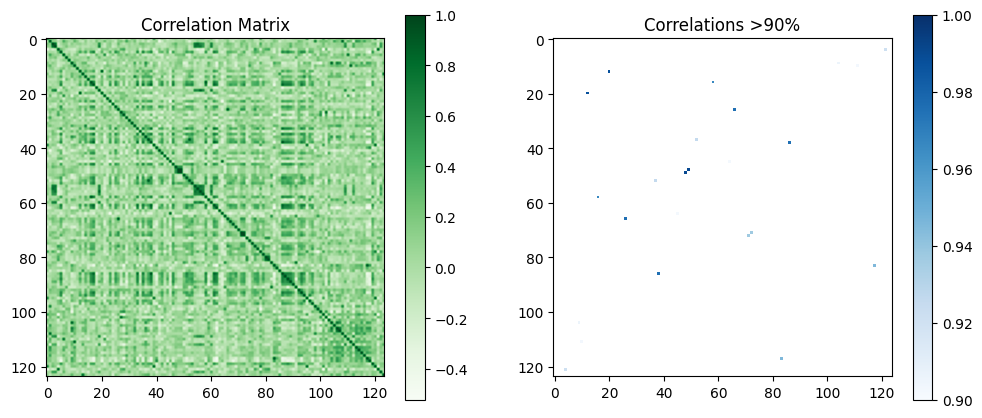

In [112]:
##################################################################################################################
#
# YouDo:
# Make a pair of plots as follows:
#    1) Show the correlation matrix between columns of the data
#        (hint 1: it should be 124x124, hint 2: check out plt.imshow() 
#         Hint 2: numpy has a function for generating the correlation matrix)
#
#    2) Make a similar plot showing correlation > 90%
#
#  Stretch goal:  using plt.subplot()  make a single figure with both plots side-by-side
#
#######################################  BEGIN STUDENT CODE  #####################################################
#found numpy function for correlation matrix.
# np.corrcoef?

corr = np.corrcoef(df, rowvar=False)
#per documentaion, rowvar=false to use columns as the variables.
corr

#check shape is 124x124
#print(corr.shape)

# hmmm... i got 125x125. think need to not include label variable which is 0/1
df_corr = df.iloc[: , 1:]
#from https://sparkbyexamples.com/pandas/pandas-drop-first-column-from-dataframe/

# print(df_corr.shape)

# corr_matrix = np.corrcoef(df_corr, rowvar= False)
# corr_matrix

#hmmm..for some reason numpy correlation causes nan after removing 1st column, cannot figure out why, using pandas seems to work
#per https://stackoverflow.com/questions/31619578/numpy-corrcoef-compute-correlation-matrix-while-ignoring-missing-data
#numpy corrcoef is not nan friendly but pandas is.
corr2 = df_corr.corr(method='pearson')
print(corr2)
print(corr2.shape)
#matrix is 124 x 124

# use plt.imshow to plot the correlation matrix
# plt.imshow?
#some ideas for code came from here:https://kanoki.org/2022/01/17/matplotlib-heatmap-for-correlation-matrix-using-dataframe/

fig, axes = plt.subplots(1, 2, figsize=(12,5))
corr_plot = axes[0].imshow(corr2,cmap= 'Greens')
#get colorbar legend
fig.colorbar(corr_plot,ax=axes[0])
axes[0].set_title('Correlation Matrix')

#make a plot where correlation is >90%
corr_90 = corr2[corr2 > 0.90]
# #going to fill diagonal since this is autocorrelation
np.fill_diagonal(corr_90.values, np.nan)
#took code inspiration from: https://stackoverflow.com/questions/35405222/pandas-how-to-drop-self-correlation-from-correlation-matrix
#print(corr_90)

#use plt,imshow to plot >90% correlations
corr90_plot = axes[1].imshow(corr_90, cmap= 'Blues',vmin=0.9, vmax=1.0, interpolation= 'nearest')
fig.colorbar(corr90_plot,ax=axes[1])
axes[1].set_title('Correlations >90%')

plt.tight_layout

plt.show()



#code is combo of attempting different things from above two websites.
#######################################   END STUDENT CODE   #####################################################


In [43]:
##################################################################################################################
#
# YouDo:
#  1) Remove any rows with na values
# 
#  2) Split the data into "test" and "train" bits with ~30% in the test set.
#       The "Label" column is the "y" data.  All other columns are the "X" data
#       Give them these names:
#       X_train, X_test, y_train, y_test

#######################################  BEGIN STUDENT CODE  #####################################################

# 1)


 
#2)

#######################################   END STUDENT CODE   #####################################################


In [45]:
#Build a model to classify the Label based on the other columns

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=8675309)
clf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=8675309,
                       verbose=0, warm_start=False)

In [48]:
# Test the model
predictions = clf.predict(X_test)
reality = y_test

In [50]:
# YouDo:
#  1) Evaluate the "goodness" of the predictions and write a paragraph describing the results as a markdown.
#
#######################################  BEGIN STUDENT CODE  #####################################################


#######################################   END STUDENT CODE   #####################################################


0.8125

# Analysis
It goes here.